<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/EDA_Lab_6_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab Exercise 6

Analyze Online Retail Customer Purchases using GroupBy:
Dataset: Online Retail Dataset available from Kaggle
(https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset
- Import pandas and load the "online_retail.csv" data into a DataFrame.
- Use info and describe to understand data types, identify potential missing values,
and explore summary statistics for numerical features.
- Create new features based on customer demographics (e.g., Country, Age Group
based on birth year).
  - Use groupby to group data by "Country". Calculate:
  - Average order value per country
  - Total number of purchases per country
  - Most frequently purchased product categories (using value counts
within groups)
  - Create bar charts to visualize average order value.

1. Data Loading and Initial Exploration
- Import pandas and load the online_retail.csv dataset into a DataFrame.
- Use info() and describe() to examine the dataset's structure, data types, potential missing values, and summary statistics of numerical features.
- Identify any patterns or anomalies in the data that could be important for further analysis.

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('online_retail.csv')

# Data Inspection using info and describe
print(df.info())  # Checking the data types and missing values
print(df.describe())  # Checking summary statistics for numerical features


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None
            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000

2. Data Cleaning:

a. Handle missing values:

- Fill missing Description values with a placeholder (e.g., 'Unknown').
- Decide on an appropriate strategy for rows with missing CustomerID (e.g., exclude them or impute values).

b. Remove invalid data
  - Exclude transactions with negative Quantity or UnitPrice values, as these may represent returns or errors.

In [ ]:
# Replace missing 'Description' values with 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

# Drop rows with missing 'CustomerID' as they represent transactions without identifiable customers
df.dropna(subset=['CustomerID'], inplace=True)

# Remove invalid data (e.g., negative quantities or prices)
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

3. Feature Engineering:

 a. Create new features for customer demographics (if applicable) or transaction-level analysis:

  - Calculate the Total Order Value by multiplying Quantity with UnitPrice.
  - Optionally, create an Age Group based on customer information if available.

  b. Grouping & Aggregation:

  - Average Order Value per country: The mean of TotalOrderValue is calculated for each country.
  - Total Purchases per country: The total quantity sold is calculated for each country.
  - Most Frequently Purchased Product Categories per country: The most frequent product in each country is determined using .value_counts()

In [ ]:
# Feature Engineering: Calculate Total Order Value (Quantity * UnitPrice)
df['TotalOrderValue'] = df['Quantity'] * df['UnitPrice']

# Grouping by 'Country' to get insights
# i. Average Order Value per country
avg_order_value = df.groupby('Country')['TotalOrderValue'].mean().reset_index()

# ii. Total Purchases (Quantity) per country
total_purchases = df.groupby('Country')['Quantity'].sum().reset_index()

# iii. Most Frequently Purchased Product Categories per country
most_frequent_products = df.groupby('Country')['Description'].agg(lambda x: x.value_counts().idxmax()).reset_index()


4. Data Visualization:

- Bar charts are created to visualize:
- The Average Order Value per country.
- The Total Purchases per country.
- The Most Frequently Purchased Product Categories in each country.


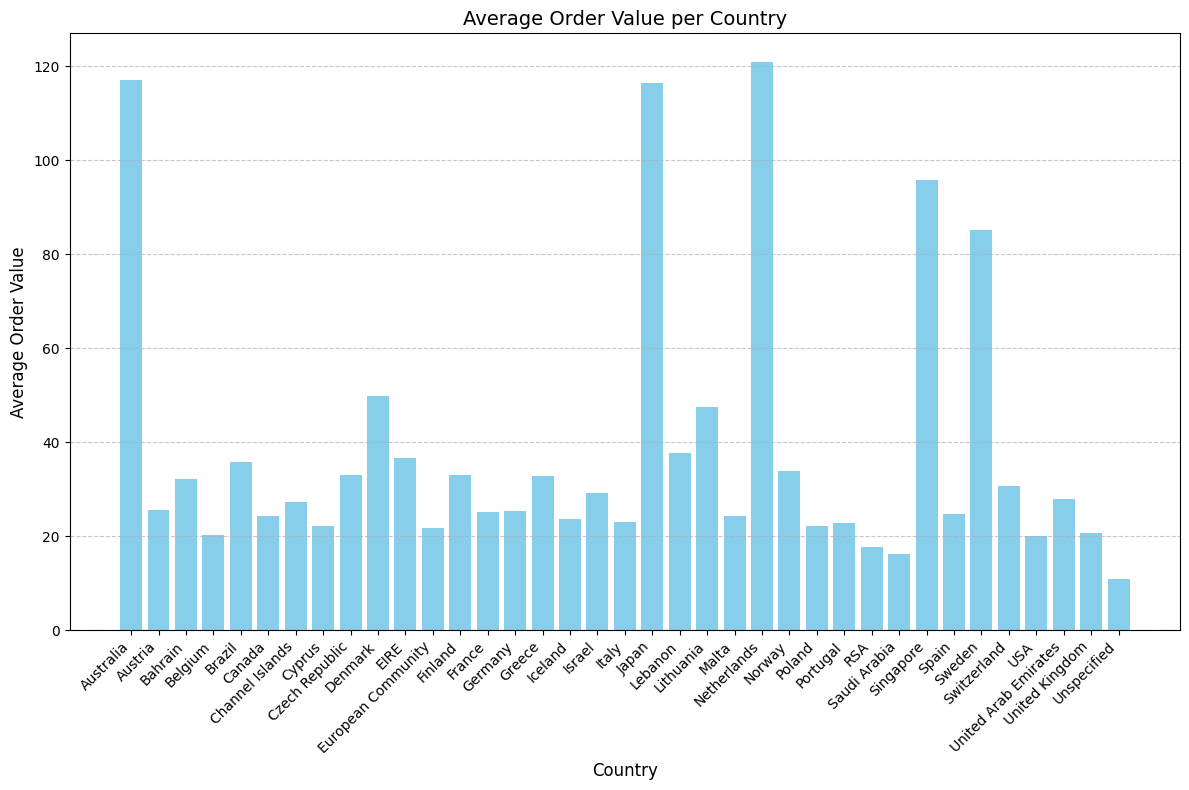

In [ ]:
# 1. Average Order Value per Country (Bar Chart)
plt.figure(figsize=(12, 8))
plt.bar(avg_order_value['Country'], avg_order_value['TotalOrderValue'], color='skyblue')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Order Value', fontsize=12)
plt.title('Average Order Value per Country', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

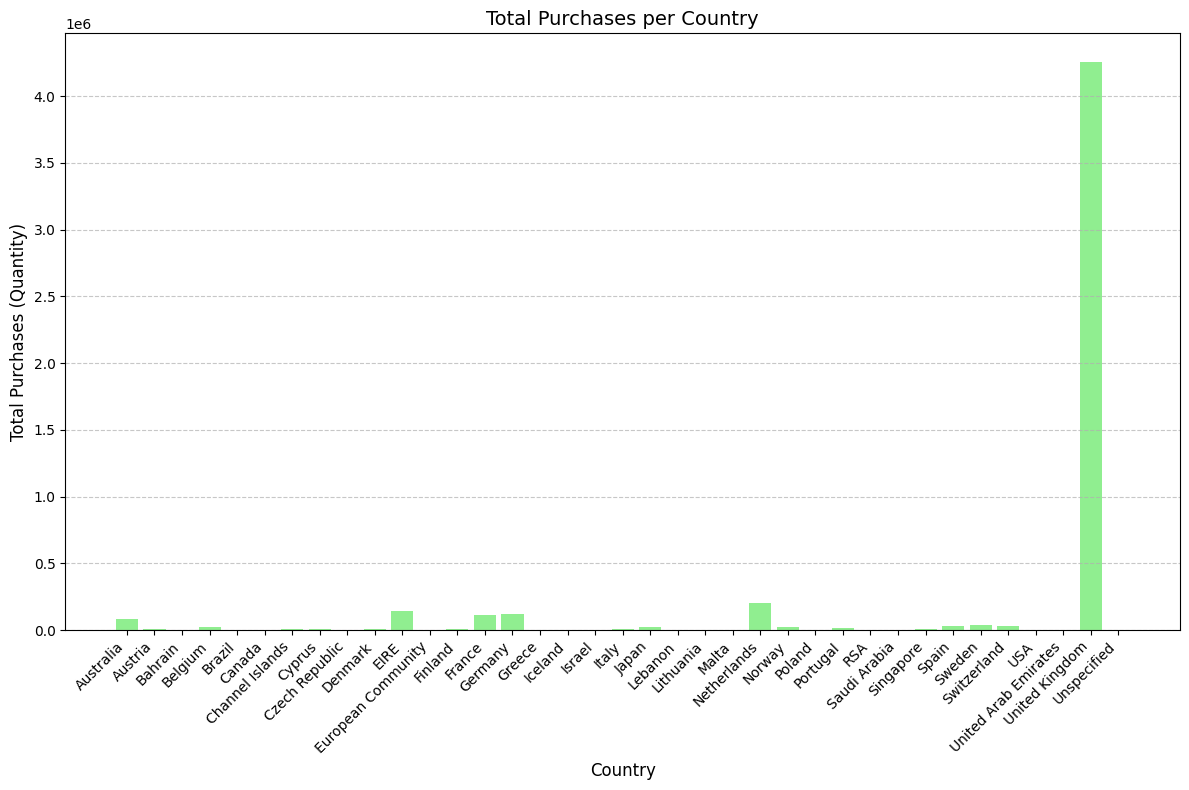

In [ ]:
# 2. Total Purchases per Country (Bar Chart)
plt.figure(figsize=(12, 8))
plt.bar(total_purchases['Country'], total_purchases['Quantity'], color='lightgreen')
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Purchases (Quantity)', fontsize=12)
plt.title('Total Purchases per Country', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


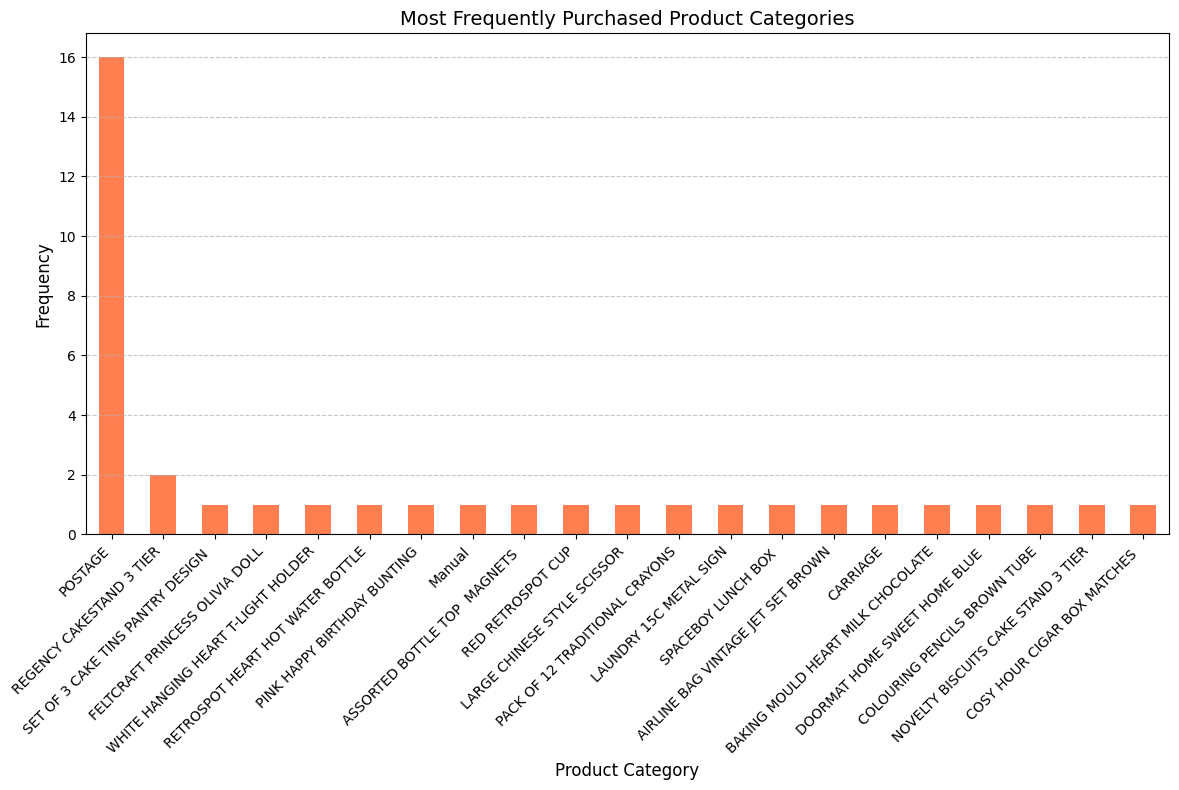

In [ ]:
# 3. Most Frequently Purchased Product Categories per Country (Bar Chart)
plt.figure(figsize=(12, 8))
product_counts = most_frequent_products['Description'].value_counts()
product_counts.plot(kind='bar', color='coral', figsize=(12, 8))
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Most Frequently Purchased Product Categories', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()